

> 



In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

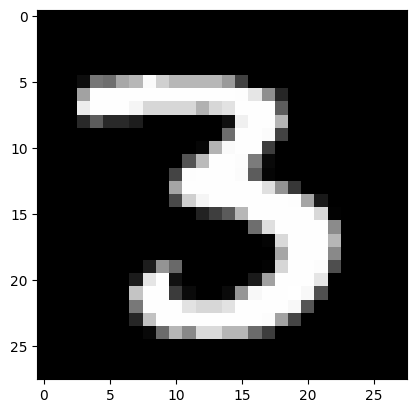

In [37]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[12], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels,
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

For ReLU Activation Function

In [38]:
train_steps = 1000
learning_rate = 0.1

hidden_layer_sizes = [8,16,32, 64, 128, 256, 512, 1024, 2048]
accuracies = []

In [39]:
for size in hidden_layer_sizes:
  W_hidden = tf.Variable(tf.random.uniform(shape=(784, size), minval=-0.1, maxval=0.1))
  b_hidden = tf.Variable(tf.zeros(shape=(size,)))
  W = tf.Variable(np.zeros([size, 10]).astype(np.float32))
  b = tf.Variable(np.zeros(10, dtype=np.float32))
  for step in range(train_steps):
      img_batch, lbl_batch = data.next_batch()
      with tf.GradientTape() as tape:
          hidden_layer = tf.matmul(img_batch, W_hidden) + b_hidden
          hidden_layer = tf.nn.relu(hidden_layer)

          logits = tf.matmul(hidden_layer, W) + b
          xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
              logits=logits, labels=lbl_batch))

      grads = tape.gradient(xent, [W_hidden, b_hidden, W, b])

      W_hidden.assign_sub(learning_rate * grads[0])
      b_hidden.assign_sub(learning_rate * grads[1])
      W.assign_sub(learning_rate * grads[2])
      b.assign_sub(learning_rate * grads[3])

      if not step % 100:
          preds = tf.argmax(logits, axis=1, output_type=tf.int32)
          acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                              tf.float32))
          print("Loss: {} Accuracy: {}".format(xent, acc))

  test_hidden_layer = tf.matmul(data.test_data, W_hidden) + b_hidden
  test_hidden_layer = tf.nn.relu(test_hidden_layer)
  test_logits = tf.matmul(test_hidden_layer, W) + b
  test_preds = tf.argmax(test_logits, axis=1, output_type=tf.int32)

  test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
  accuracies.append(test_accuracy)

Loss: 2.3025851249694824 Accuracy: 0.125
Loss: 1.0829581022262573 Accuracy: 0.6875
Loss: 0.6363315582275391 Accuracy: 0.8203125
Loss: 0.3902783989906311 Accuracy: 0.90625
Loss: 0.49848538637161255 Accuracy: 0.875
Starting new epoch...
Loss: 0.3466172218322754 Accuracy: 0.8984375
Loss: 0.3291884660720825 Accuracy: 0.9375
Loss: 0.25169700384140015 Accuracy: 0.890625
Loss: 0.2730407118797302 Accuracy: 0.90625
Loss: 0.2663060128688812 Accuracy: 0.8984375
Starting new epoch...
Loss: 2.3025851249694824 Accuracy: 0.09375
Loss: 0.9721188545227051 Accuracy: 0.7890625
Loss: 0.6166035532951355 Accuracy: 0.828125
Loss: 0.3559415936470032 Accuracy: 0.875
Loss: 0.5204741954803467 Accuracy: 0.8359375
Starting new epoch...
Loss: 0.259819895029068 Accuracy: 0.8984375
Loss: 0.4393833875656128 Accuracy: 0.875
Loss: 0.2981337308883667 Accuracy: 0.90625
Loss: 0.3361515998840332 Accuracy: 0.9140625
Starting new epoch...
Loss: 0.35485827922821045 Accuracy: 0.90625
Loss: 2.3025851249694824 Accuracy: 0.09375
L

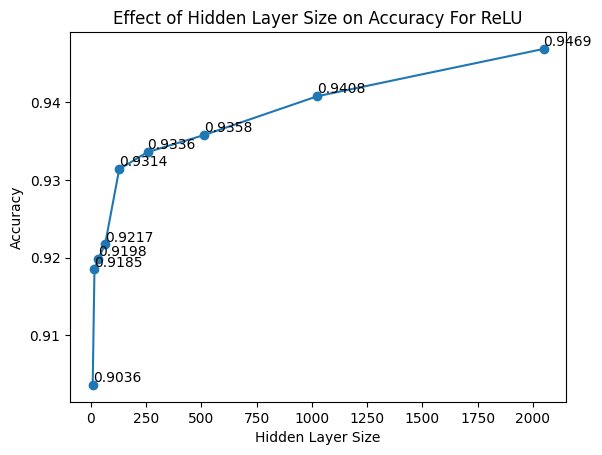

In [40]:
plt.plot(hidden_layer_sizes, accuracies, marker='o')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Accuracy')
plt.title('Effect of Hidden Layer Size on Accuracy For ReLU')
for i, acc in enumerate(accuracies):
    plt.text(hidden_layer_sizes[i], acc, f'{acc:.4f}', ha='left', va='bottom')
plt.show()

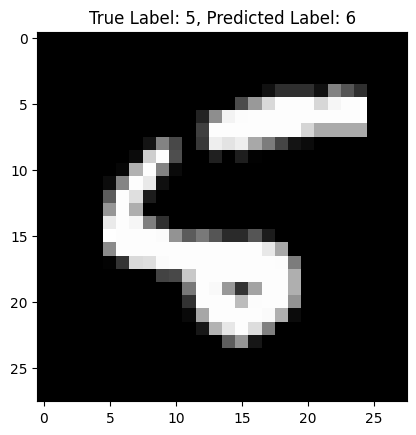

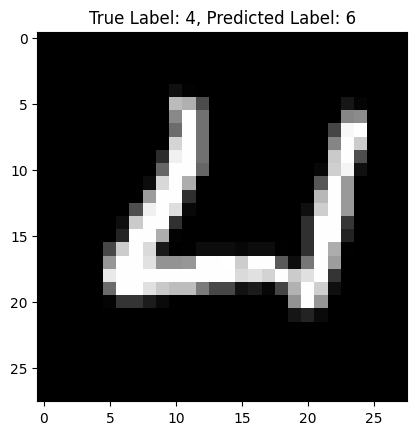

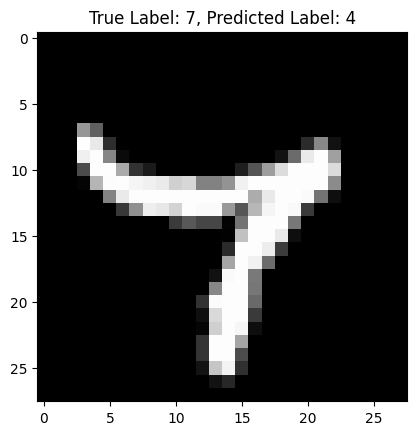

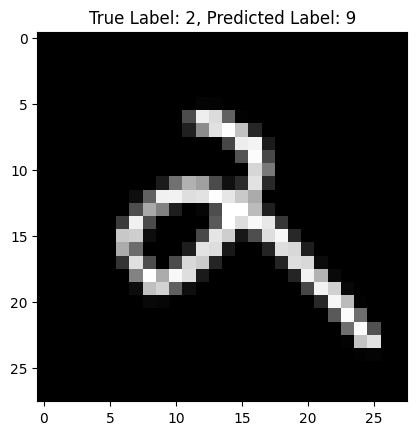

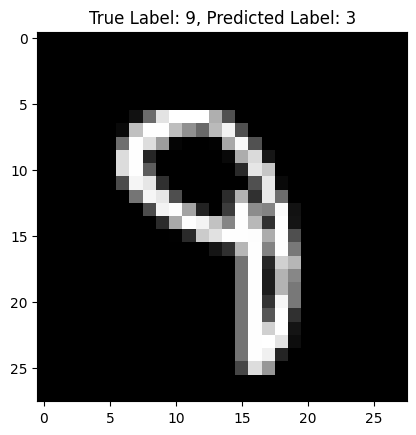

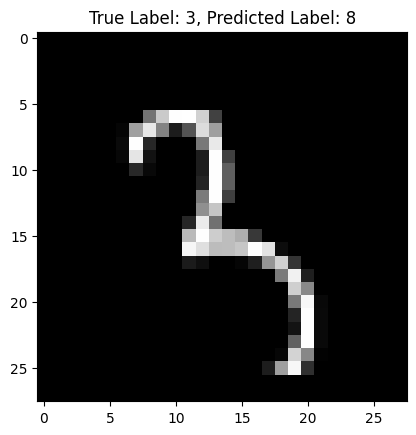

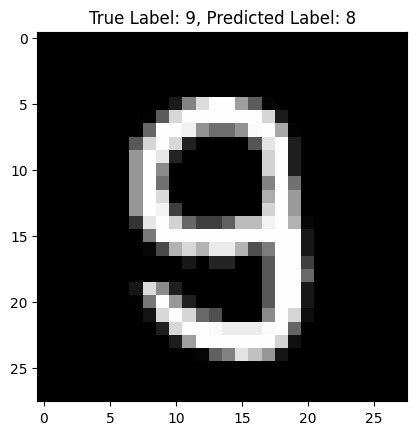

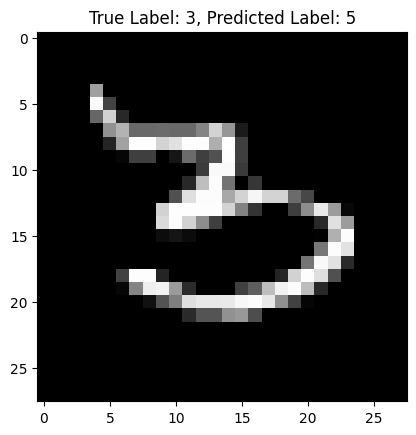

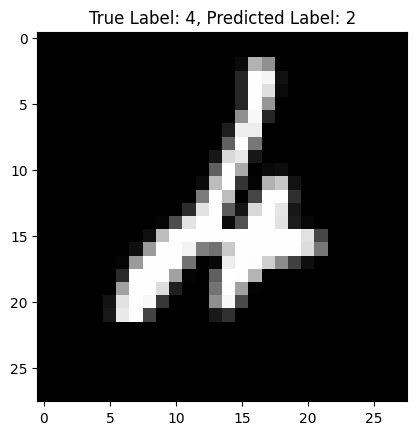

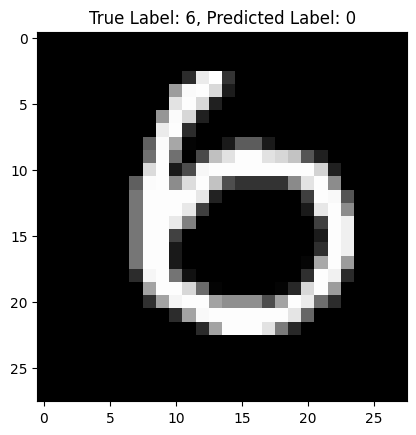

In [41]:
misclassified_indices = []
for i in range(len(data.test_labels)):
    if test_preds[i] != data.test_labels[i]:
        misclassified_indices.append(i)

#Selecting some misclassified images to visualize
num_misclassified_to_visualize = 10
for i in range(num_misclassified_to_visualize):
    misclassified_index = misclassified_indices[i]
    misclassified_image = data.test_data[misclassified_index]
    true_label = data.test_labels[misclassified_index]
    predicted_label = test_preds[misclassified_index]

    misclassified_image = tf.reshape(misclassified_image, (28, 28))

    plt.figure()
    plt.imshow(misclassified_image, cmap='gray')
    plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
    plt.show()

For Sigmoid Activation Function

In [42]:
train_steps = 1000
learning_rate = 0.1

hidden_layer_sizes = [8,16,32, 64, 128, 256, 512, 1024, 2048]
accuracies = []

In [43]:
for size in hidden_layer_sizes:
  W_hidden = tf.Variable(tf.random.uniform(shape=(784, size), minval=-0.1, maxval=0.1))
  b_hidden = tf.Variable(tf.zeros(shape=(size,)))
  W = tf.Variable(np.zeros([size, 10]).astype(np.float32))
  b = tf.Variable(np.zeros(10, dtype=np.float32))
  for step in range(train_steps):
      img_batch, lbl_batch = data.next_batch()
      with tf.GradientTape() as tape:
          hidden_layer = tf.matmul(img_batch, W_hidden) + b_hidden
          hidden_layer = tf.keras.activations.sigmoid(hidden_layer)

          logits = tf.matmul(hidden_layer, W) + b
          xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
              logits=logits, labels=lbl_batch))

      grads = tape.gradient(xent, [W_hidden, b_hidden, W, b])

      W_hidden.assign_sub(learning_rate * grads[0])
      b_hidden.assign_sub(learning_rate * grads[1])
      W.assign_sub(learning_rate * grads[2])
      b.assign_sub(learning_rate * grads[3])

      if not step % 100:
          preds = tf.argmax(logits, axis=1, output_type=tf.int32)
          acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                              tf.float32))
          print("Loss: {} Accuracy: {}".format(xent, acc))

  test_hidden_layer = tf.matmul(data.test_data, W_hidden) + b_hidden
  test_hidden_layer = tf.keras.activations.sigmoid(test_hidden_layer)
  test_logits = tf.matmul(test_hidden_layer, W) + b
  test_preds = tf.argmax(test_logits, axis=1, output_type=tf.int32)

  test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
  accuracies.append(test_accuracy)

Loss: 2.3025851249694824 Accuracy: 0.109375
Loss: 2.287445306777954 Accuracy: 0.1015625
Loss: 2.1726362705230713 Accuracy: 0.34375
Loss: 1.9253432750701904 Accuracy: 0.4921875
Starting new epoch...
Loss: 1.606032133102417 Accuracy: 0.546875
Loss: 1.322797179222107 Accuracy: 0.6796875
Loss: 1.1946147680282593 Accuracy: 0.6484375
Loss: 1.1152663230895996 Accuracy: 0.625
Loss: 0.9613972902297974 Accuracy: 0.7578125
Starting new epoch...
Loss: 0.870369017124176 Accuracy: 0.7890625
Loss: 2.3025851249694824 Accuracy: 0.109375
Loss: 2.220043182373047 Accuracy: 0.3671875
Loss: 1.9815993309020996 Accuracy: 0.4375
Loss: 1.5711967945098877 Accuracy: 0.5859375
Starting new epoch...
Loss: 1.32230806350708 Accuracy: 0.6171875
Loss: 1.090954303741455 Accuracy: 0.734375
Loss: 0.9184538125991821 Accuracy: 0.7578125
Loss: 0.8959295153617859 Accuracy: 0.7734375
Starting new epoch...
Loss: 0.709210991859436 Accuracy: 0.8203125
Loss: 0.8047236800193787 Accuracy: 0.7890625
Loss: 2.3025851249694824 Accuracy:

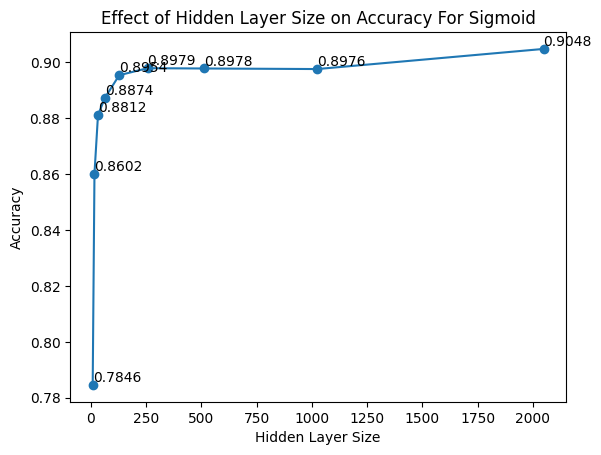

In [44]:
plt.plot(hidden_layer_sizes, accuracies, marker='o')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Accuracy')
plt.title('Effect of Hidden Layer Size on Accuracy For Sigmoid')
for i, acc in enumerate(accuracies):
    plt.text(hidden_layer_sizes[i], acc, f'{acc:.4f}', ha='left', va='bottom')
plt.show()

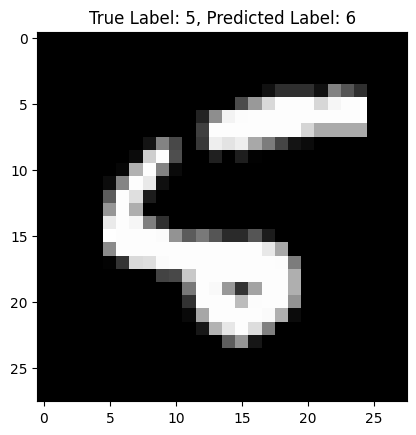

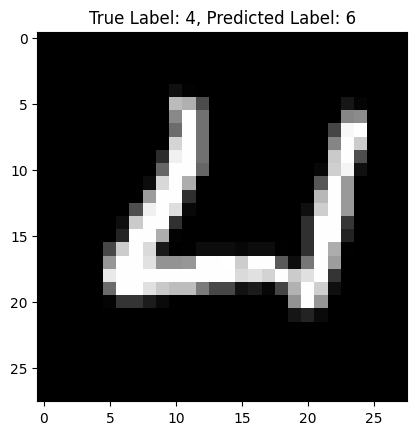

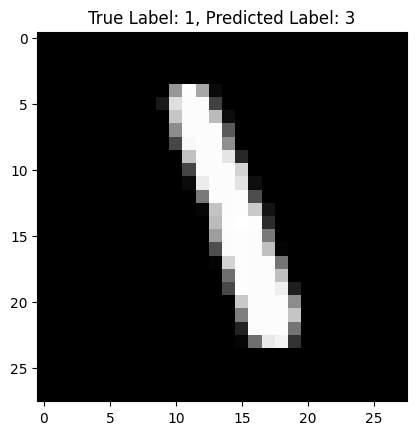

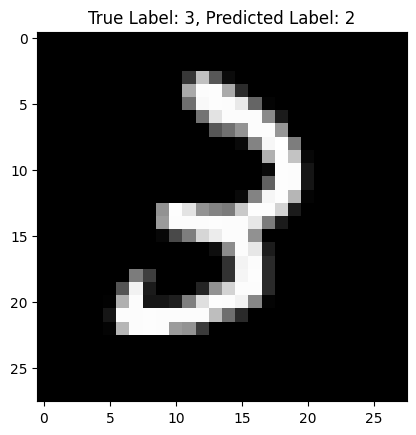

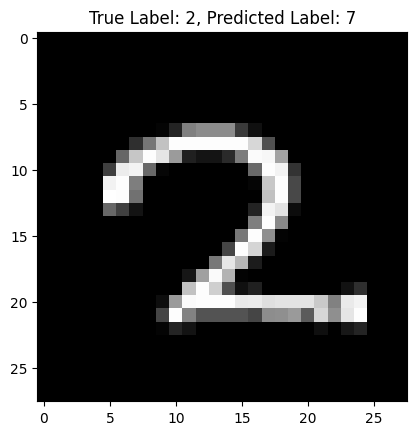

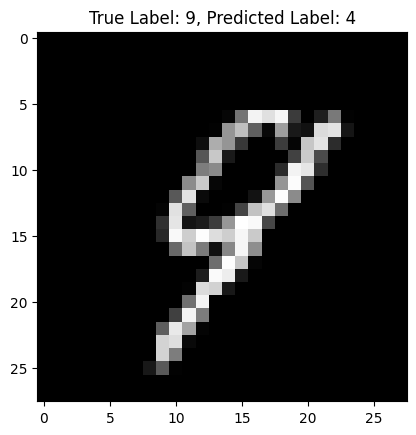

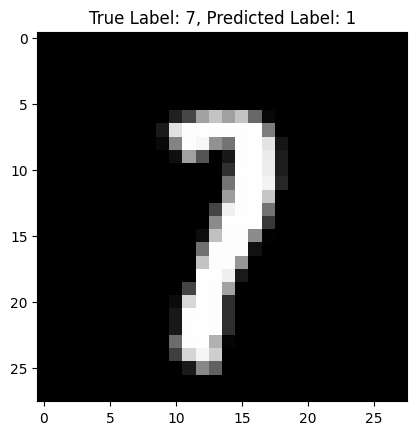

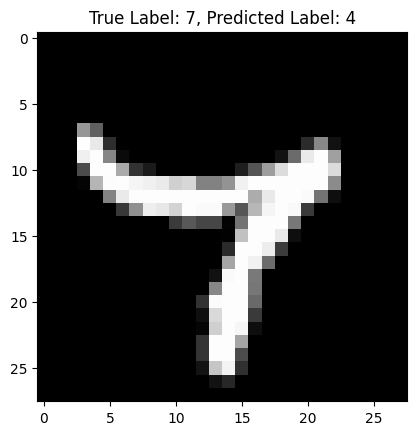

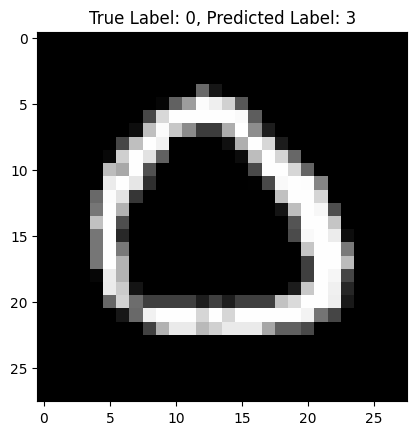

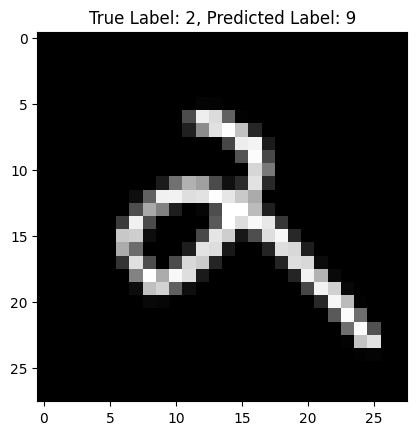

In [45]:
misclassified_indices = []
for i in range(len(data.test_labels)):
    if test_preds[i] != data.test_labels[i]:
        misclassified_indices.append(i)

#Selecting some misclassified images to visualize
num_misclassified_to_visualize = 10
for i in range(num_misclassified_to_visualize):
    misclassified_index = misclassified_indices[i]
    misclassified_image = data.test_data[misclassified_index]
    true_label = data.test_labels[misclassified_index]
    predicted_label = test_preds[misclassified_index]

    misclassified_image = tf.reshape(misclassified_image, (28, 28))

    plt.figure()
    plt.imshow(misclassified_image, cmap='gray')
    plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
    plt.show()

For Tanh Activation Function

In [46]:
train_steps = 1000
learning_rate = 0.1

hidden_layer_sizes = [8,16,32, 64, 128, 256, 512, 1024, 2048]
accuracies = []

In [47]:
for size in hidden_layer_sizes:
  W_hidden = tf.Variable(tf.random.uniform(shape=(784, size), minval=-0.1, maxval=0.1))
  b_hidden = tf.Variable(tf.zeros(shape=(size,)))
  W = tf.Variable(np.zeros([size, 10]).astype(np.float32))
  b = tf.Variable(np.zeros(10, dtype=np.float32))
  for step in range(train_steps):
      img_batch, lbl_batch = data.next_batch()
      with tf.GradientTape() as tape:
          hidden_layer = tf.matmul(img_batch, W_hidden) + b_hidden
          hidden_layer = tf.keras.activations.tanh(hidden_layer)

          logits = tf.matmul(hidden_layer, W) + b
          xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
              logits=logits, labels=lbl_batch))

      grads = tape.gradient(xent, [W_hidden, b_hidden, W, b])

      W_hidden.assign_sub(learning_rate * grads[0])
      b_hidden.assign_sub(learning_rate * grads[1])
      W.assign_sub(learning_rate * grads[2])
      b.assign_sub(learning_rate * grads[3])

      if not step % 100:
          preds = tf.argmax(logits, axis=1, output_type=tf.int32)
          acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                              tf.float32))
          print("Loss: {} Accuracy: {}".format(xent, acc))

  test_hidden_layer = tf.matmul(data.test_data, W_hidden) + b_hidden
  test_hidden_layer = tf.keras.activations.tanh(test_hidden_layer)
  test_logits = tf.matmul(test_hidden_layer, W) + b
  test_preds = tf.argmax(test_logits, axis=1, output_type=tf.int32)

  test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
  accuracies.append(test_accuracy)

Loss: 2.3025851249694824 Accuracy: 0.09375
Loss: 1.4910873174667358 Accuracy: 0.6015625
Loss: 1.0074049234390259 Accuracy: 0.71875
Starting new epoch...
Loss: 0.6870968341827393 Accuracy: 0.828125
Loss: 0.6520555019378662 Accuracy: 0.828125
Loss: 0.5246604681015015 Accuracy: 0.8828125
Loss: 0.36790192127227783 Accuracy: 0.9375
Loss: 0.42142975330352783 Accuracy: 0.875
Starting new epoch...
Loss: 0.3235863149166107 Accuracy: 0.9140625
Loss: 0.29925376176834106 Accuracy: 0.921875
Loss: 2.3025851249694824 Accuracy: 0.109375
Loss: 1.261326789855957 Accuracy: 0.7265625
Loss: 0.6302326321601868 Accuracy: 0.8359375
Starting new epoch...
Loss: 0.545401394367218 Accuracy: 0.84375
Loss: 0.4432130455970764 Accuracy: 0.84375
Loss: 0.44791895151138306 Accuracy: 0.875
Loss: 0.3760722875595093 Accuracy: 0.890625
Starting new epoch...
Loss: 0.34870314598083496 Accuracy: 0.8984375
Loss: 0.3066006898880005 Accuracy: 0.8984375
Loss: 0.42503756284713745 Accuracy: 0.875
Loss: 2.3025851249694824 Accuracy: 0

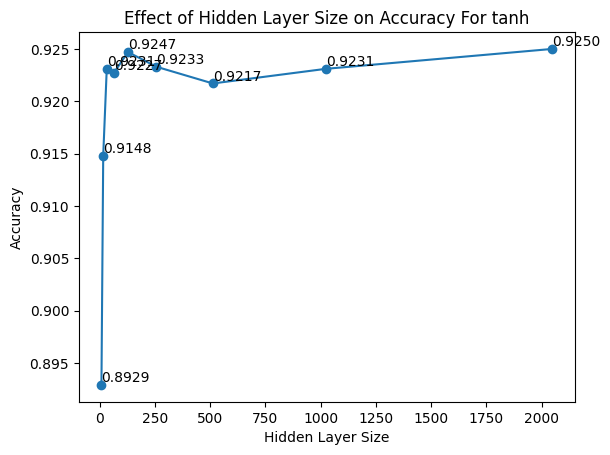

In [48]:
plt.plot(hidden_layer_sizes, accuracies, marker='o')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Accuracy')
plt.title('Effect of Hidden Layer Size on Accuracy For tanh')
for i, acc in enumerate(accuracies):
    plt.text(hidden_layer_sizes[i], acc, f'{acc:.4f}', ha='left', va='bottom')
plt.show()

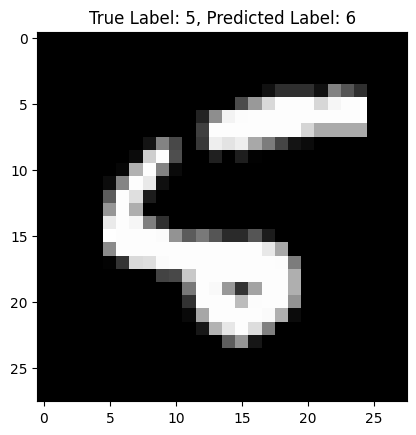

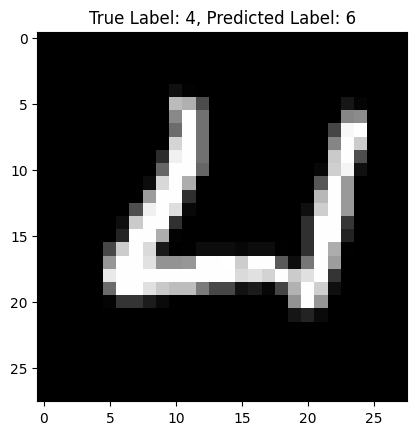

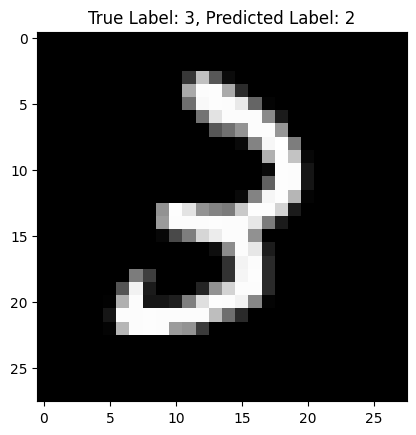

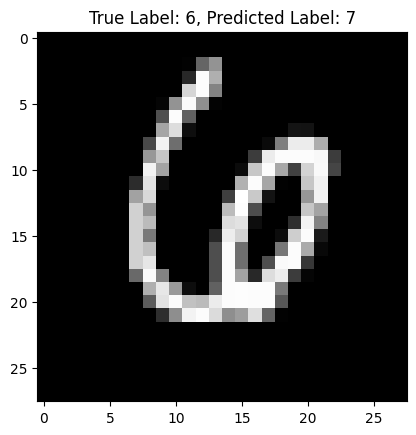

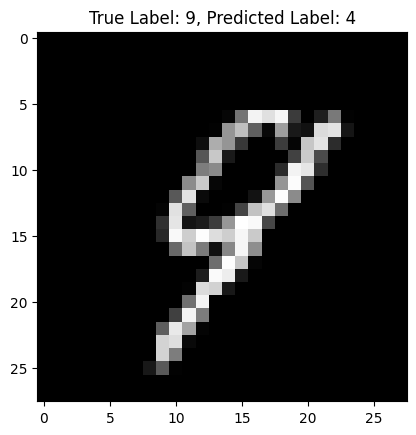

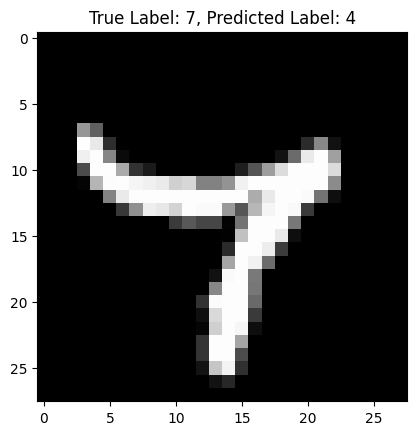

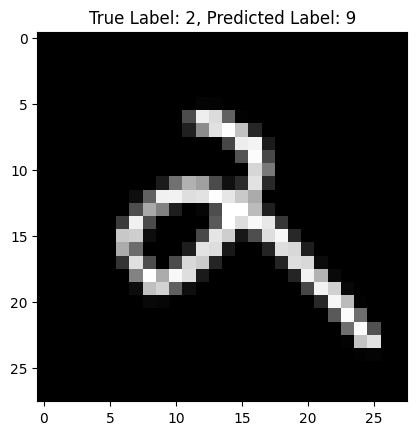

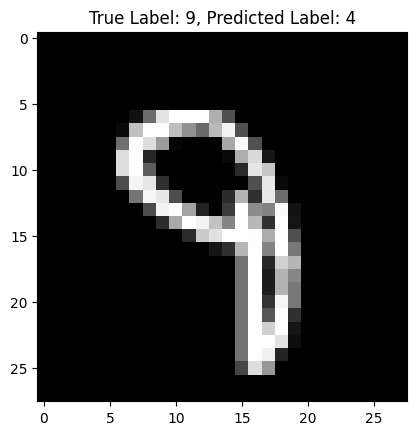

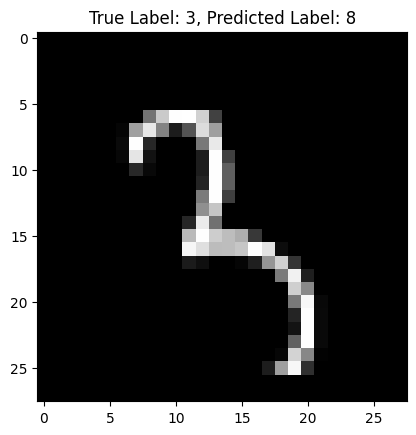

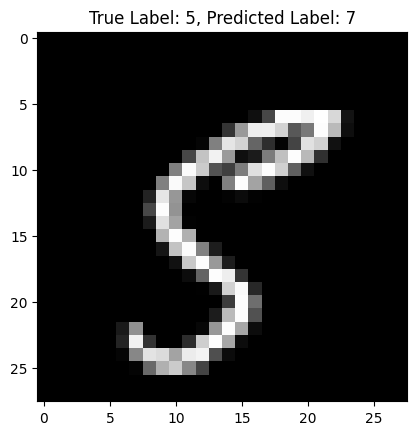

In [49]:
misclassified_indices = []
for i in range(len(data.test_labels)):
    if test_preds[i] != data.test_labels[i]:
        misclassified_indices.append(i)

#Selecting some misclassified images to visualize
num_misclassified_to_visualize = 10
for i in range(num_misclassified_to_visualize):
    misclassified_index = misclassified_indices[i]
    misclassified_image = data.test_data[misclassified_index]
    true_label = data.test_labels[misclassified_index]
    predicted_label = test_preds[misclassified_index]

    misclassified_image = tf.reshape(misclassified_image, (28, 28))

    plt.figure()
    plt.imshow(misclassified_image, cmap='gray')
    plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
    plt.show()

Using Fashion_MNIST dataset

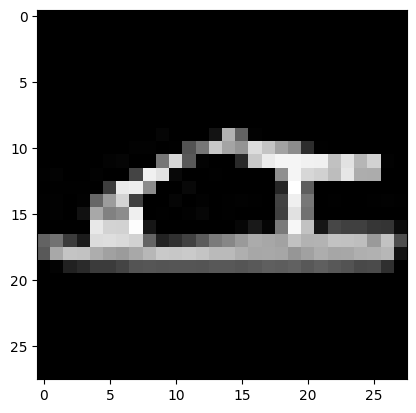

In [50]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[120], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels,
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In [51]:
train_steps = 1000
learning_rate = 0.1

hidden_layer_sizes = [8,16,32, 64, 128, 256, 512, 1024, 2048]
accuracies = []

In [52]:
for size in hidden_layer_sizes:
  W_hidden = tf.Variable(tf.random.uniform(shape=(784, size), minval=-0.1, maxval=0.1))
  b_hidden = tf.Variable(tf.zeros(shape=(size,)))
  W = tf.Variable(np.zeros([size, 10]).astype(np.float32))
  b = tf.Variable(np.zeros(10, dtype=np.float32))
  for step in range(train_steps):
      img_batch, lbl_batch = data.next_batch()
      with tf.GradientTape() as tape:
          hidden_layer = tf.matmul(img_batch, W_hidden) + b_hidden
          hidden_layer = tf.nn.relu(hidden_layer)

          logits = tf.matmul(hidden_layer, W) + b
          xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
              logits=logits, labels=lbl_batch))

      grads = tape.gradient(xent, [W_hidden, b_hidden, W, b])

      W_hidden.assign_sub(learning_rate * grads[0])
      b_hidden.assign_sub(learning_rate * grads[1])
      W.assign_sub(learning_rate * grads[2])
      b.assign_sub(learning_rate * grads[3])

      if not step % 100:
          preds = tf.argmax(logits, axis=1, output_type=tf.int32)
          acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                              tf.float32))
          print("Loss: {} Accuracy: {}".format(xent, acc))

  test_hidden_layer = tf.matmul(data.test_data, W_hidden) + b_hidden
  test_hidden_layer = tf.nn.relu(test_hidden_layer)
  test_logits = tf.matmul(test_hidden_layer, W) + b
  test_preds = tf.argmax(test_logits, axis=1, output_type=tf.int32)


  test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
  accuracies.append(test_accuracy)

Loss: 2.3025851249694824 Accuracy: 0.09375
Loss: 0.956937849521637 Accuracy: 0.609375
Loss: 0.7762616276741028 Accuracy: 0.734375
Loss: 0.7852361798286438 Accuracy: 0.75
Loss: 0.6408902406692505 Accuracy: 0.78125
Starting new epoch...
Loss: 0.6384916305541992 Accuracy: 0.765625
Loss: 0.5638372302055359 Accuracy: 0.796875
Loss: 0.5534512996673584 Accuracy: 0.78125
Loss: 0.5414912700653076 Accuracy: 0.8359375
Loss: 0.48768526315689087 Accuracy: 0.828125
Starting new epoch...
Loss: 2.3025851249694824 Accuracy: 0.109375
Loss: 0.864533007144928 Accuracy: 0.671875
Loss: 0.6949570178985596 Accuracy: 0.7421875
Loss: 0.6065036058425903 Accuracy: 0.796875
Loss: 0.6259350776672363 Accuracy: 0.7734375
Starting new epoch...
Loss: 0.5800888538360596 Accuracy: 0.7890625
Loss: 0.5573982000350952 Accuracy: 0.765625
Loss: 0.5750676393508911 Accuracy: 0.8203125
Loss: 0.49821504950523376 Accuracy: 0.7890625
Starting new epoch...
Loss: 0.3031313419342041 Accuracy: 0.90625
Loss: 2.3025851249694824 Accuracy:

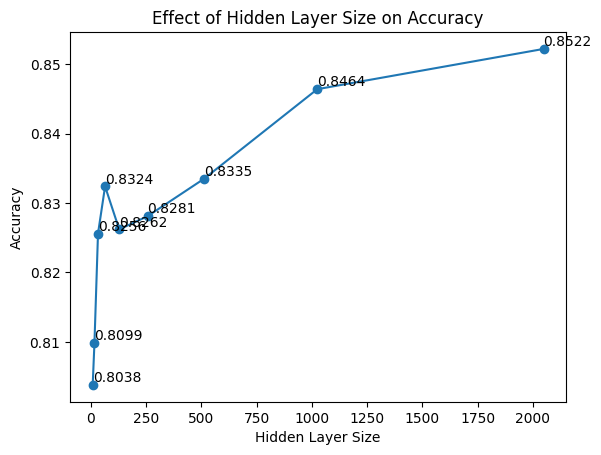

In [53]:
plt.plot(hidden_layer_sizes, accuracies, marker='o')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Accuracy')
plt.title('Effect of Hidden Layer Size on Accuracy')
for i, acc in enumerate(accuracies):
    plt.text(hidden_layer_sizes[i], acc, f'{acc:.4f}', ha='left', va='bottom')
plt.show()

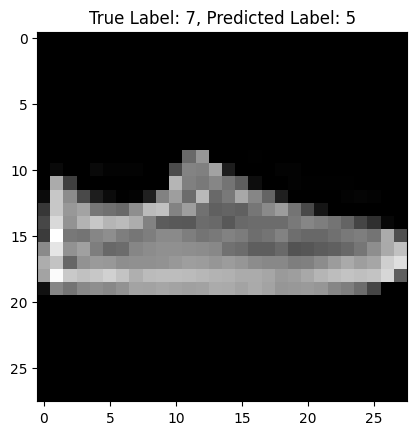

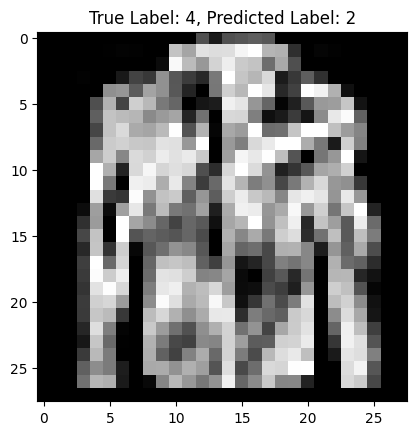

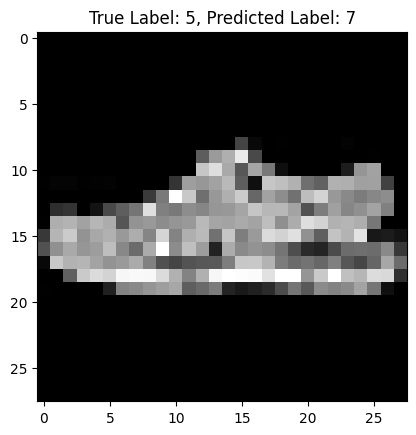

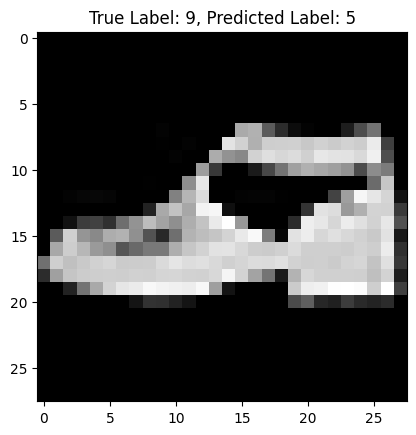

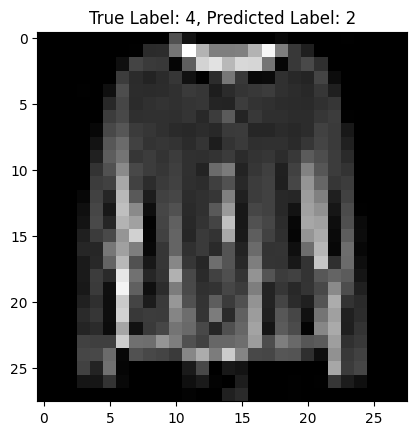

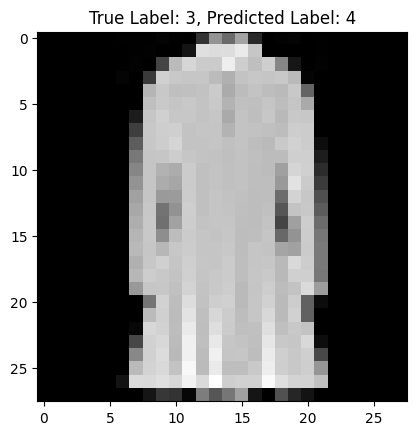

In [54]:
misclassified_indices = []
for i in range(len(data.test_labels)):
    if test_preds[i] != data.test_labels[i]:
        misclassified_indices.append(i)

#Selecting some misclassified images to visualize
num_misclassified_to_visualize = 6
for i in range(num_misclassified_to_visualize):
    misclassified_index = misclassified_indices[i]
    misclassified_image = data.test_data[misclassified_index]
    true_label = data.test_labels[misclassified_index]
    predicted_label = test_preds[misclassified_index]

    misclassified_image = tf.reshape(misclassified_image, (28, 28))

    plt.figure()
    plt.imshow(misclassified_image, cmap='gray')
    plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
    plt.show()

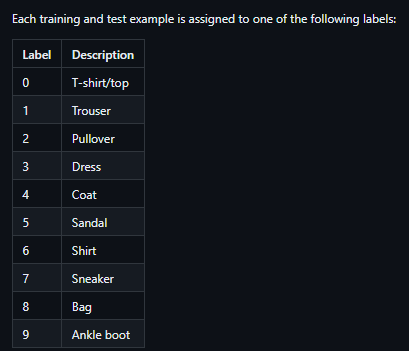

References:


1.   https://blog.ai.ovgu.de/posts/jens/2019/002_tf20_basic_mnist/index.html
2.   https://github.com/zalandoresearch/fashion-mnist



